In [8]:
import pandas as pd
import numpy as np
from keras.layers import Dense,LSTM, Embedding
from keras.models import Model, Sequential
debate1 = pd.read_csv('/home/noah/Datasets/Presidential Debate/debate1.csv').to_numpy()
debate2 = pd.read_csv('/home/noah/Datasets/Presidential Debate/debate2.csv').to_numpy()
bidenTownHall = pd.read_csv('/home/noah/Datasets/Presidential Debate/bidenTownHall.csv').to_numpy()
trumpTownHall = pd.read_csv('/home/noah/Datasets/Presidential Debate/trumpTownHall.csv').to_numpy()

In [22]:
print("Speakers at trump town hall: \n" , np.unique(trumpTownHall[:,0]))
print("Amount of times trump speaks:",len([trump for trump in trumpTownHall[:,0] if trump == "President Trump"]))

Speakers at trump town hall: 
 ['Adam Schucher' 'Barbara Peña' 'Cindy Velez' 'Cristy Montesinos Alonso'
 'Isabella Peña' 'Jacqueline Lugo' 'Moriah Geene' 'Paulette Dale'
 'President Trump' 'Savannah' 'Savannah Guthrie' 'Speaker 1']
Amount of times trump speaks: 202


In [21]:
print("Speakers at biden town hall: \n" , np.unique(bidenTownHall[:,0]))
print("Amount of times biden speaks:",len([biden for biden in bidenTownHall[:,0] if biden == "Joe Biden"]))

Speakers at biden town hall: 
 ['Andrew Lewis' 'Angelia Politarhos' 'Anthony Archer' 'Cedric Humphrey'
 'George Stephanopoulos' 'George Stephanopoulus' 'Joe Biden'
 'Keenan Wilson' 'Kelly Lee' 'Mark Hoffman' 'Michele Ellison'
 'Mieke Haeck' 'Nathan Osburn' 'Nicholas Fed' 'Speaker 1' 'Speaker 2'
 'Speaker 3' 'Voice Over']
Amount of times biden speaks: 125


In [24]:
print("Speakers at debate 2: \n" , np.unique(debate2[:,0]))
print("Amount of times biden speaks:",len([biden for biden in debate2[:,0] if biden == "Joe Biden"]))
print("Amount of times trump speaks:",len([trump for trump in debate2[:,0] if trump == "Donald Trump"]))

Speakers at debate 2: 
 ['Donald Trump' 'Joe Biden' 'Kristen Welker']
Amount of times biden speaks: 133
Amount of times trump speaks: 190


In [26]:
print("Speakers at debate 1: \n" , np.unique(debate1[:,0]))
print("Amount of times biden speaks:",len([biden for biden in debate1[:,0] if biden == "Vice President Joe Biden"]))
print("Amount of times trump speaks:",len([trump for trump in debate1[:,0] if trump == "President Donald J. Trump"]))

Speakers at debate 1: 
 ['Chris Wallace' 'Chris Wallace:' 'President Donald J. Trump'
 'Vice President Joe Biden']
Amount of times biden speaks: 249
Amount of times trump speaks: 314


In [118]:
events = [debate1,debate2,bidenTownHall,trumpTownHall]

print("Max padding: ",max([max([len(sequence.split()) for sequence in event[:,2]]) for event in events]))

Max padding:  282


In [189]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
vocab = 1000
maxLen = 282
tok = Tokenizer(num_words = vocab)


#May be slight skew towards model predicting trump as there are more samples for trump.
#Trump - 0 
#Biden - 1
def extractDataFromSet(data, names, wordThresh):
    nameCol = data[:,0]
    textCol = data[:,2]
    length = len(nameCol)
    indices = [i for i in range(length) if nameCol[i] in names and len(textCol[i].split())>wordThresh]
    tok.fit_on_texts(data[indices,2])
    textCol = pad_sequences(tok.texts_to_sequences(textCol[indices]), maxlen = maxLen)
    targets = []
    for i in indices:
        if(nameCol[i]==names[0]):
            targets.append(0)
        else:
            targets.append(1)

    
  
    return np.hstack((textCol,np.expand_dims(targets, axis=1)))

In [224]:
thresh = 4
set1 = extractDataFromSet(debate1, ['President Donald J. Trump','Vice President Joe Biden'],thresh)
set2 = extractDataFromSet(debate2, ['Donald Trump','Joe Biden'],thresh)
set3 = extractDataFromSet(trumpTownHall, ['President Trump','Joe Biden'],thresh)
set4 = extractDataFromSet(bidenTownHall, ['President Trump','Joe Biden'],thresh)

In [225]:
cleanData = np.concatenate([set1, set2, set3, set4])
sequences = cleanData[:,:-1]
targets = cleanData[:,-1]
indices = np.arange(len(targets))
np.random.shuffle(indices)
sequences = sequences[indices]
targets = targets[indices]
print(targets)

[0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1
 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1
 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1
 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0
 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1
 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0
 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0
 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1
 0 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0
 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 1 1 0 0 0 1 0 1 

In [233]:
model = Sequential()
model.add(Embedding(vocab, 32, input_length = maxLen))
#model.add(LSTM(32, dropout = 0.2, recurrent_dropout = 0.2, return_sequences = True))
model.add(LSTM(32, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop',loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(sequences,targets,validation_split = 0.2, epochs = 100)

Epoch 1/100
24/24 [==============================] - 4s 175ms/step - loss: 0.6831 - accuracy: 0.5944 - val_loss: 0.6717 - val_accuracy: 0.5615
Epoch 2/100
24/24 [==============================] - 4s 162ms/step - loss: 0.6515 - accuracy: 0.5971 - val_loss: 0.6596 - val_accuracy: 0.5615
Epoch 3/100
24/24 [==============================] - 4s 164ms/step - loss: 0.6272 - accuracy: 0.6399 - val_loss: 0.7072 - val_accuracy: 0.5722
Epoch 4/100
24/24 [==============================] - 4s 163ms/step - loss: 0.5817 - accuracy: 0.7336 - val_loss: 0.6255 - val_accuracy: 0.7754
Epoch 5/100
24/24 [==============================] - 4s 163ms/step - loss: 0.5257 - accuracy: 0.7818 - val_loss: 0.5679 - val_accuracy: 0.7807
Epoch 6/100
24/24 [==============================] - 4s 164ms/step - loss: 0.4555 - accuracy: 0.8126 - val_loss: 0.6669 - val_accuracy: 0.6738
Epoch 7/100
24/24 [==============================] - 4s 165ms/step - loss: 0.4067 - accuracy: 0.8367 - val_loss: 0.4863 - val_accuracy: 0.7647

Epoch 58/100
24/24 [==============================] - 4s 164ms/step - loss: 0.0138 - accuracy: 0.9946 - val_loss: 1.8402 - val_accuracy: 0.7059
Epoch 59/100
24/24 [==============================] - 4s 167ms/step - loss: 0.0192 - accuracy: 0.9906 - val_loss: 1.9652 - val_accuracy: 0.7219
Epoch 60/100
24/24 [==============================] - 4s 162ms/step - loss: 0.0303 - accuracy: 0.9933 - val_loss: 1.6981 - val_accuracy: 0.7219
Epoch 61/100
24/24 [==============================] - 4s 171ms/step - loss: 0.0136 - accuracy: 0.9960 - val_loss: 1.9911 - val_accuracy: 0.7059
Epoch 62/100
24/24 [==============================] - 4s 162ms/step - loss: 0.0107 - accuracy: 0.9960 - val_loss: 1.9682 - val_accuracy: 0.7273
Epoch 63/100
24/24 [==============================] - 4s 165ms/step - loss: 0.0115 - accuracy: 0.9960 - val_loss: 1.9256 - val_accuracy: 0.7112
Epoch 64/100
24/24 [==============================] - 4s 178ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 1.9183 - val_accuracy:

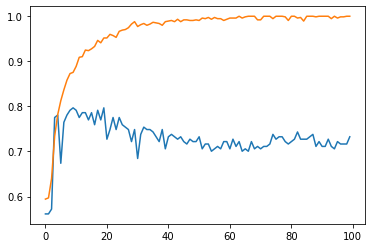

In [234]:
import matplotlib.pyplot as plt
plt.plot(model.history.history['val_accuracy'])
plt.plot(model.history.history['accuracy'])